# Clasificación

En este caso, se estará trabajando con información sobre cancer de mama. A través del archivo "breast-cancer-wisconsin.data" se desea poder crear un modelo capaz de indentificar si un tumor es benigno o maligno.

Auotores: Stefano Aragoni, Carol Arevalo

1. Número de código de la muestra: número de identificación
2. Grosor de los grumos: 1 - 10
3. Uniformidad del tamaño de las células: 1 - 10
4. Uniformidad de la forma celular: 1 - 10
5. Adhesión marginal: 1 - 10
6. Tamaño de una sola célula epitelial: 1 - 10
7. Núcleos desnudos: 1 - 10
8. Cromatina Blanda: 1 - 10
9. Núcleos normales: 1 - 10
10. Mitosis: 1 - 10
11. Clase: (2 para benigno, 4 para maligno)

_______________________
## Parte 1
### 1.1. Haga   una   exploración   rápida   de   sus   datos   para   eso   haga   un   resumen   de   su dataset.

#### Importar Librerías
Como primer paso, se importaron las siguientes librerías que permiten poder llevar a cabo el análisis respectivo.

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from quickda.explore_data import *
import datetime
from pandas_profiling import ProfileReport
from quickda.clean_data import *
from quickda.explore_numeric import *
from quickda.explore_categoric import *
from quickda.explore_numeric_categoric import *
from quickda.explore_time_series import *
%matplotlib inline

#### Datos
Se cargan los datos a través de Pandas. Ya que el archivo original no cuenta con nombres de columnas, se le agregó dicha información manualmente.

In [55]:
# Convertimos data a csv
datos = pd.read_csv('breast-cancer-wisconsin.data', header=None)

# Se le asigna un nombre a cada columna
datos.columns = ['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape', 'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']

A continuación se presentan los primeros 5 y los últimos 5 datos. En este caso, como se puede observar a conmtinuación, todos los valores son númericos. Es decir que posiblemente no se requerirá crear nuevas variables dummy.

In [56]:
datos.head()

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [57]:
datos.tail()

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


#### Análisis Exploratorio de Datos (EDA)

A continuación se realizó un análisis exploratorio inicial para entender más a profundidad los datos; incluyendo los tipos de datos y qué significan los mismos. Por otro lado, también se quería encontrar datos faltantes, datos nulos, entre otros. 


A la hora de revisar el documento de los datos, fuera del entorno de python, se pudo detectar que habían ciertos valores con el valor "?". Por tal razón, como primer paso se cambió dicho valor por otro nulo, para poder indentificar las filas específicas y poder remplazar dichos valores posteriormente.

In [58]:
#para todos los ? los cambiamos por NaN
datos.replace('?', np.nan, inplace=True)

datos.isnull()

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
694,False,False,False,False,False,False,False,False,False,False,False
695,False,False,False,False,False,False,False,False,False,False,False
696,False,False,False,False,False,False,False,False,False,False,False
697,False,False,False,False,False,False,False,False,False,False,False


En este caso, como se puede observar, contamos con algunos datos faltantes identificados en el heatmap con amarillo; más específicamente se puede observar que hay algunos datos nulos en la columna de Núcleos desnudos. Ya que son pocos datos, se estará corrigiendo esta situación en el proceso de limpieza de datos.

<AxesSubplot: >

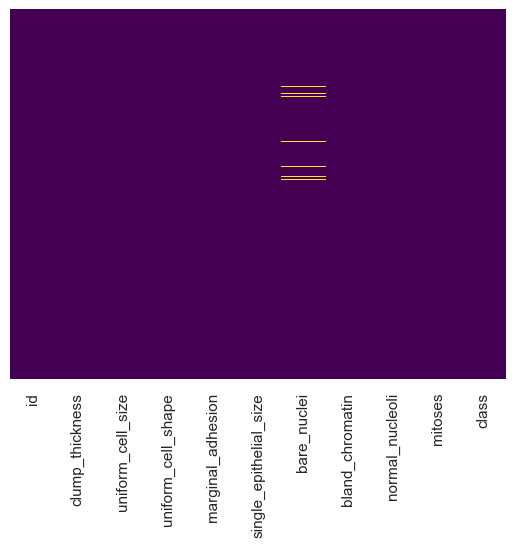

In [59]:
sns.heatmap(datos.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

A continuación se presenta el resumen de las columnas del dataset. Se presenta información sobre la cantidad de entradas (no vacías) relacionadas a cada columna, así como el tipo de información que almacena.

En este caso, la columna de bare_nuclei regresa que es de tipo objeto debido a que tiene varios valores NaN. Por ende, no todos los datos son númericos. Esto será limpiado en la sección de limpieza del dataset.

In [60]:
# Obtener información general sobre el conjunto de data
print(datos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      699 non-null    int64 
 1   clump_thickness         699 non-null    int64 
 2   uniform_cell_size       699 non-null    int64 
 3   uniform_cell_shape      699 non-null    int64 
 4   marginal_adhesion       699 non-null    int64 
 5   single_epithelial_size  699 non-null    int64 
 6   bare_nuclei             683 non-null    object
 7   bland_chromatin         699 non-null    int64 
 8   normal_nucleoli         699 non-null    int64 
 9   mitoses                 699 non-null    int64 
 10  class                   699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB
None


Asimismo, a continuación se presenta un resumen estadístico de las columnas numéricas, que incluye promedio, desviación estándar, y otros datos.

Observando rápidamente la información de las columnas, podemos observar que la mayoría de datos son representativos de tumores benignos (indicados por el valor 2).

In [61]:
# Obtener un resumen estadístico de las columnas numéricas
print(datos.describe())

                 id  clump_thickness  uniform_cell_size  uniform_cell_shape  \
count  6.990000e+02       699.000000         699.000000          699.000000   
mean   1.071704e+06         4.417740           3.134478            3.207439   
std    6.170957e+05         2.815741           3.051459            2.971913   
min    6.163400e+04         1.000000           1.000000            1.000000   
25%    8.706885e+05         2.000000           1.000000            1.000000   
50%    1.171710e+06         4.000000           1.000000            1.000000   
75%    1.238298e+06         6.000000           5.000000            5.000000   
max    1.345435e+07        10.000000          10.000000           10.000000   

       marginal_adhesion  single_epithelial_size  bland_chromatin  \
count         699.000000              699.000000       699.000000   
mean            2.806867                3.216023         3.437768   
std             2.855379                2.214300         2.438364   
min         

------------------
### 1.2. Diga   el   tipo   de   cada   una   de   las   variables   del   dataset   (cualitativa   o   categórica, cuantitativa continua, cuantitativa discreta)

1. Número de código de la muestra ------------- Categórico
2. Grosor de los grumos ------------- Cuantitativa Discreta
3. Uniformidad del tamaño de las células ------------- Cuantitativa Discreta
4. Uniformidad de la forma celular ------------- Cuantitativa Discreta
5. Adhesión marginal ------------- Cuantitativa Discreta
6. Tamaño de una sola célula epitelial ------------- Cuantitativa Discreta
7. Núcleos desnudos ------------- Cuantitativa Discreta
8. Cromatina Blanda ------------- Cuantitativa Discreta
9. Núcleos normales ------------- Cuantitativa Discreta
10. Mitosis ------------- Cuantitativa Discreta
11. Clase ------------- Categórico

A pesar de que todas las columnas almacenan valores numéricos, no todas las variables son cuantitativas. Por ejemplo, el código de la muestra hace referencia a un identificador; por otro lado, la variable clase usa 2 para representar benigno y 4 para maligno (es una variable ya convertida a dummy).

--------------

### 1.3. Incluya los gráficos exploratorios siendo consecuentes con el tipo de variable que están representando.

#### Limpieza Inicial
En este caso, el dataset contaba con varios errores de formato; incluyendo el '?' ubicado en algunas columnas. Por tal razón, antes de hacer los gráficos exploratorios, se realizó una limpieza inicial con el propósito de poder tener más control sobre los datos.

Más específicamente, se borraron estos datos (que son menos al 5% de los datos del dataset) temporalmente. Sin embargo, posteriormente se remplazará estos valores vacíos por el promedio de la variable.

In [62]:
# Limpieza inicial
# eliminar columnas con valores Nan
datos.dropna(inplace=True)


#### Gráficos Exploratorios
Como primer paso de los gráficos exploratorios, se ejcutó el comando de eda_num de QuickDa para poder obtener gráficas de diferentes columnas. Esto a través de obtener histogramas, así como diagramas de caja y bigotes. A continuación se presenta los resultados.

Las siguientes gráficas indican la distribución de los datos así como la cantidad de ciertos datos de cada variable. En el caso de casi todas las gráficas generadas, se puede observar como la mayoría de datos se ubican entre un rango de 1 a 4. Existen unos puntos atípicos, como en el caso de marginal adhesion, single epithelial size, normal nucleoli y bland chromatin, ubicados en el extremo opuesto (en el rango de 8 a 10).

Esto posiblemente se debe a que la mayoría de muestras son libres de cancer y podrían tener indicadores bajos. Sin embargo, las muestras que sí tienen tumores malignos avanzados representan una minoría entre los datos y, por ende, los datos dichos parecen ser atípicos. 

Posteriormente se analizará la relación entre dichas variables y el tipo de tumor.

Outlier Analysis - Boxplot


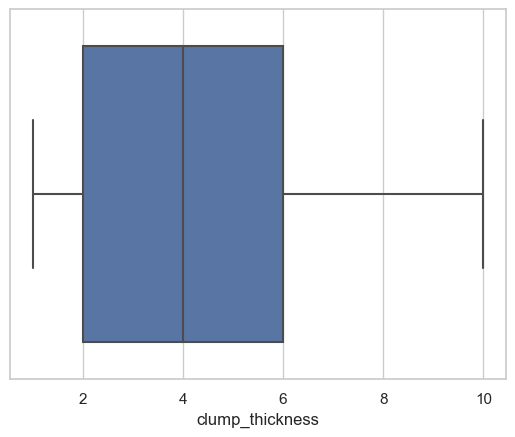

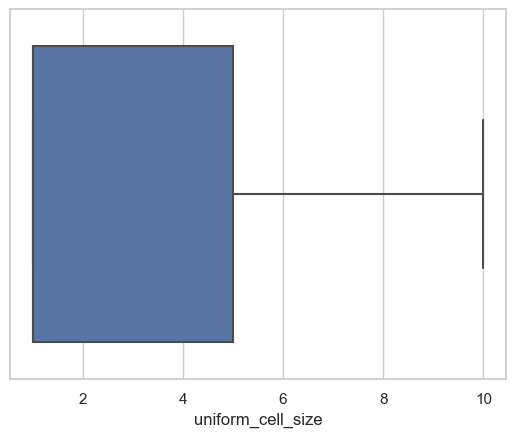

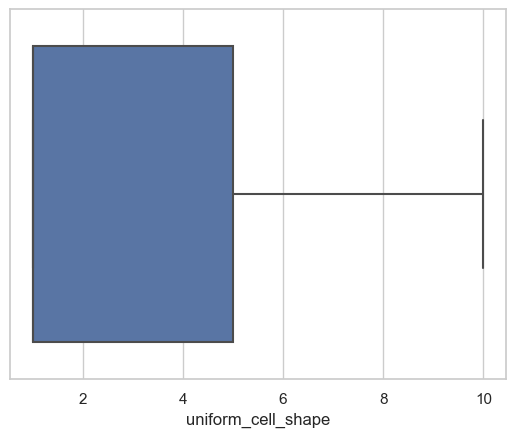

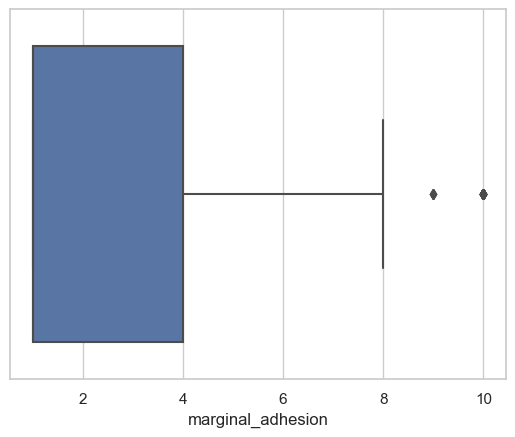

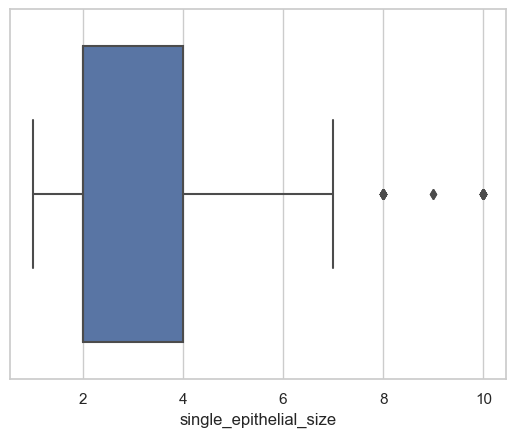

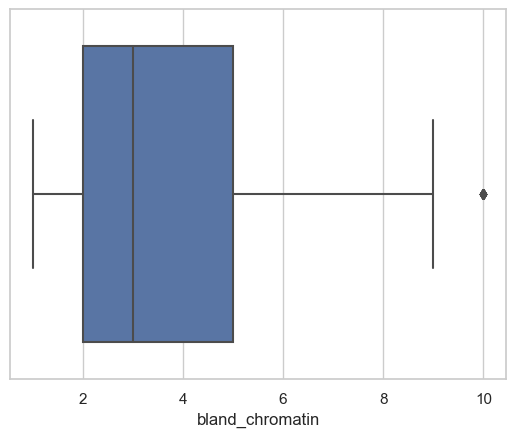

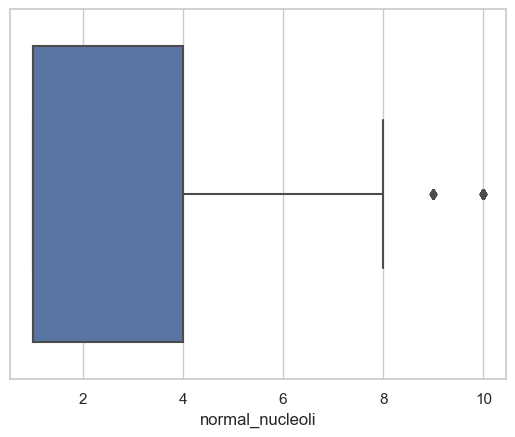

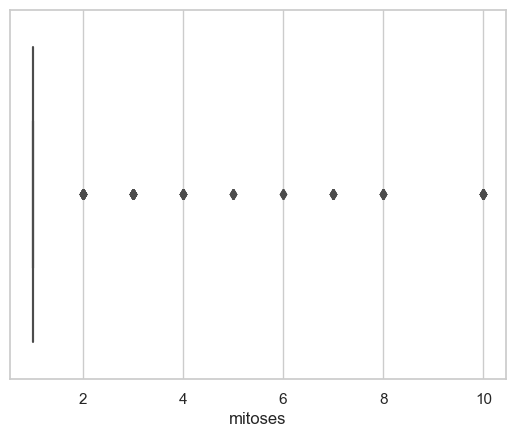

Distribution Analysis - Histogram


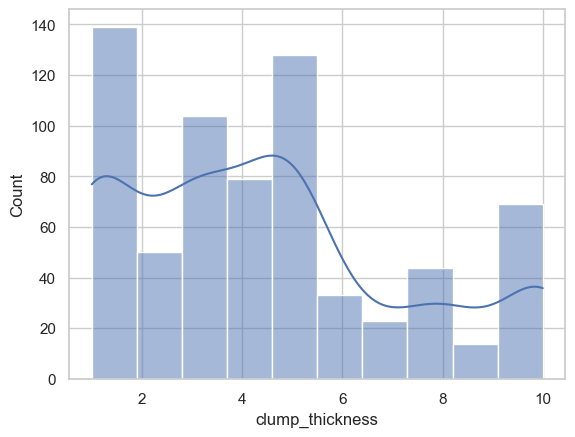

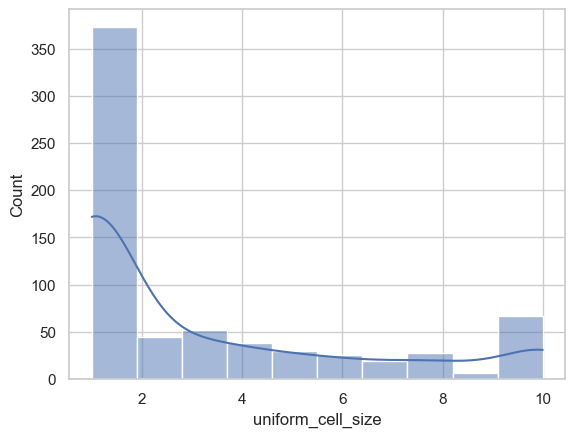

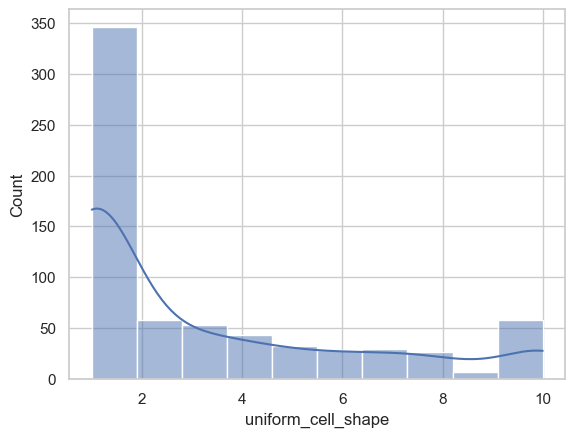

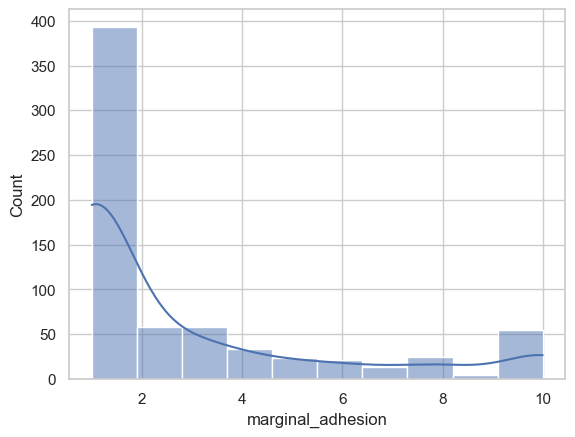

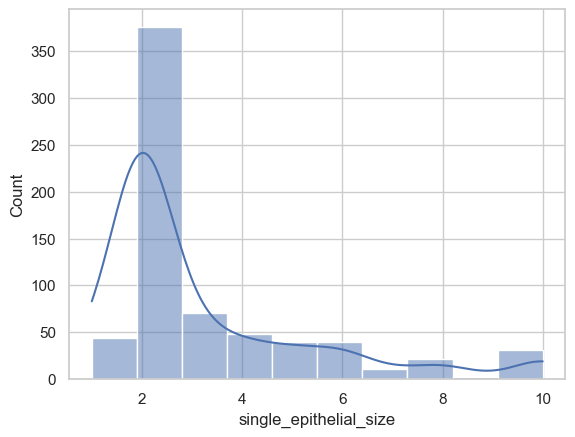

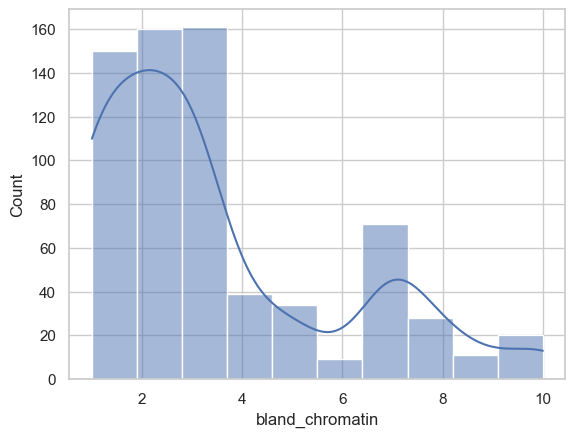

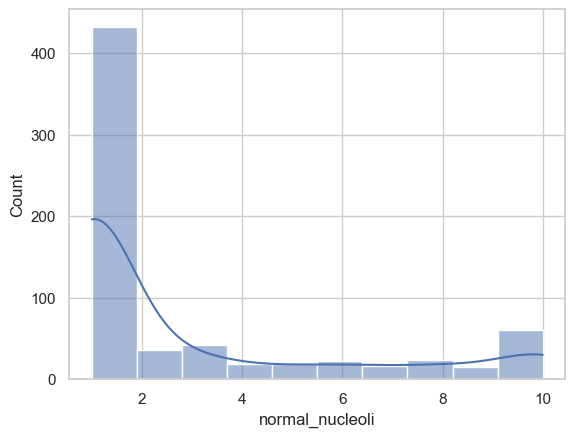

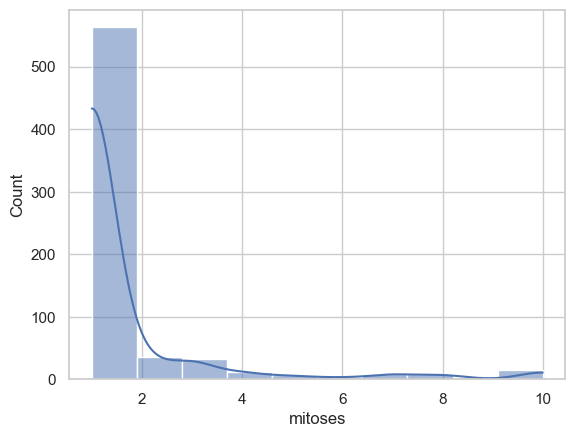

In [63]:
from copy import deepcopy
dataTemp = deepcopy(datos)

columns = ['clump_thickness', 'uniform_cell_size', 'uniform_cell_shape', 'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses']
dataTemp = dataTemp[columns]

eda_num(dataTemp)

Antes de analizar el tipo de tumor con las otras variables, primero se quizo observar la distribución entre los tumores benignos (2) y malignos (4). En este caso, como se puede ver a continuación, aproximadamente casi 70% de los datos pertenecen a tumores benignos; mientras que el resto a tumores malignos.

<AxesSubplot: xlabel='class', ylabel='count'>

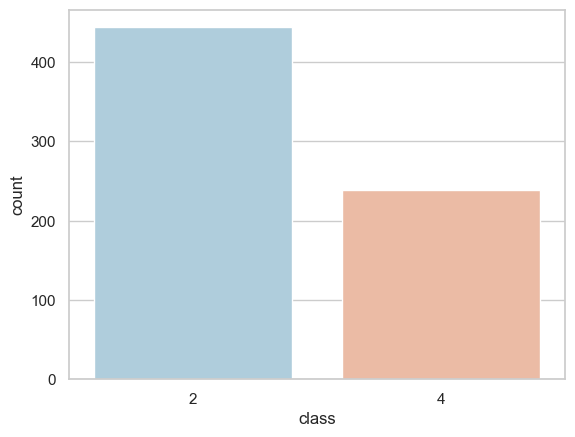

In [64]:
sns.set_style('whitegrid')
sns.countplot(x = 'class', data = datos, palette = 'RdBu_r')

La primera comparación que se quizo hacer fue entre tipo de tumor y clump_thickness. En este caso, se puede observar que la mayoría de tumores benignos tienen valores muy bajos de clump thickness. Sin embargo, en el caso de los tumores malignos, la mayoría cuenta con más clump thickness en las muestras. 

<AxesSubplot: xlabel='class', ylabel='count'>

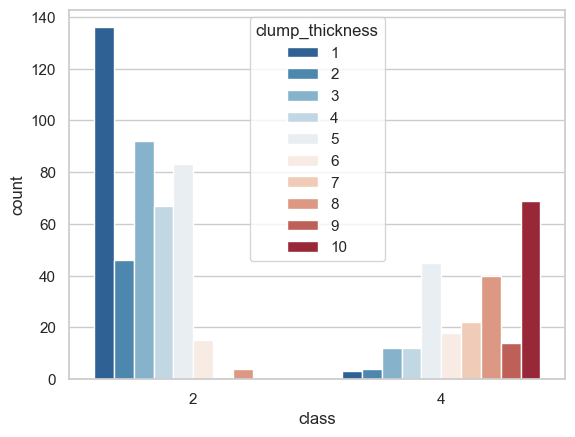

In [65]:
sns.set_style('whitegrid')
sns.countplot(x = 'class', hue = 'clump_thickness', data = datos, palette = 'RdBu_r')

Por otro lado, también se analizó la uniformidad de las celulas con el tipo de tumor. Nuevamente, los tumores benignos tienen un menor indicador de variación entre uniformidad de tamaños de células. Sin embargo, los tumores malignos indican que mientras más sea la variación, más probabilidad que sea un tumor maligno.

<AxesSubplot: xlabel='class', ylabel='count'>

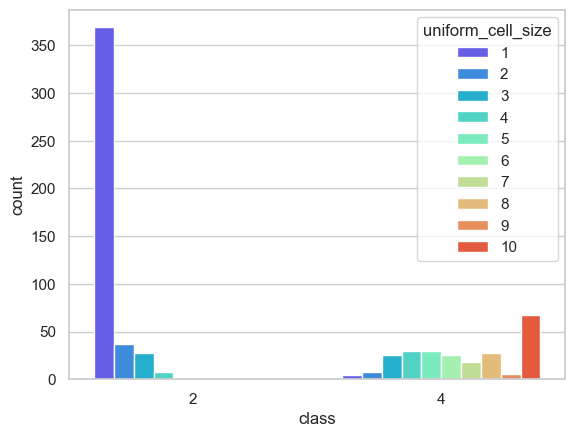

In [66]:
sns.set_style('whitegrid')
sns.countplot(x = 'class', hue = 'uniform_cell_size', data = datos, palette = 'rainbow')

Similarmente a uniform cell shape, podemos observar que mientras más bajo sea el indicador de uniform cell shape, más probabilidad hay que sea benigno el tumor. Mientras que mientras más alto sea el indicador, más probabilidad hay que sea maligno.

<AxesSubplot: xlabel='class', ylabel='count'>

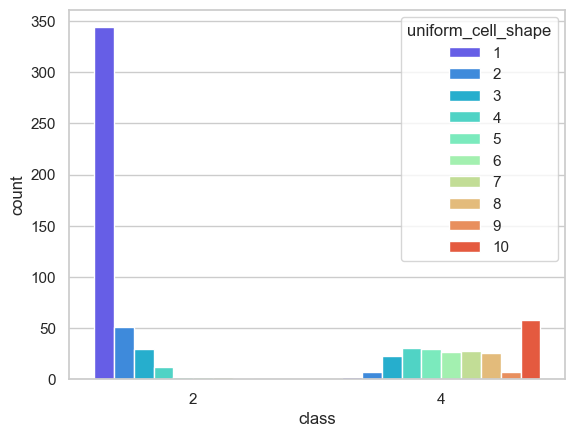

In [67]:
sns.set_style('whitegrid')
sns.countplot(x = 'class', hue = 'uniform_cell_shape', data = datos, palette = 'rainbow')

Otro aspecto que se quizo comparar era tipo de tumor con marginal adhesion. En este caso se pudo observar nuevamente el mismo patrón; mientras más bajo el indicador de marginal adhesion, más probable que sea benigno. 

<AxesSubplot: xlabel='class', ylabel='count'>

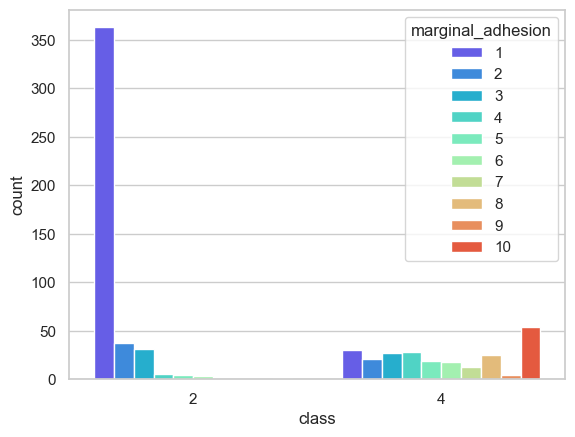

In [68]:
sns.set_style('whitegrid')
sns.countplot(x = 'class', hue = 'marginal_adhesion', data = datos, palette = 'rainbow')

Similarmente, al comparar normal nuecleoli con tipo de tumor se volvieron a obtener los mismos resultados. En este punto, se puede asumir que este es un patrón con todas las respectivas variables.

<AxesSubplot: xlabel='class', ylabel='count'>

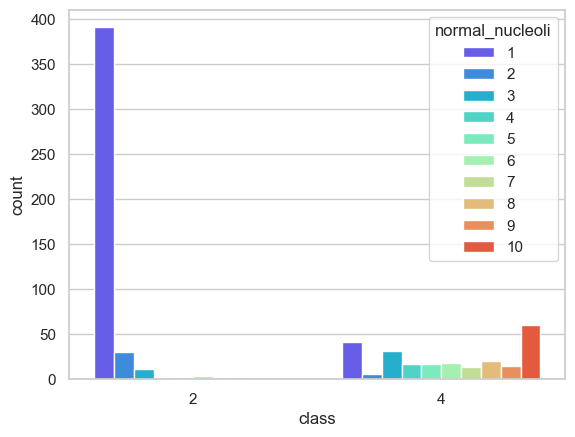

In [69]:
sns.set_style('whitegrid')
sns.countplot(x = 'class', hue = 'normal_nucleoli', data = datos, palette = 'rainbow')

Para contrastar, también se quizo determinar la distribución de otras variables. En el caso de normal nucleoli, se puede observar que la mayoría de datos tienen un bajo indicador de variación, lo cual podría corresponder a tumores benignos. Sin embargo, también se cuenta con otros valores con un indicador 10 de variación, los cuales podrían indicar la presencia de tumores malignos.

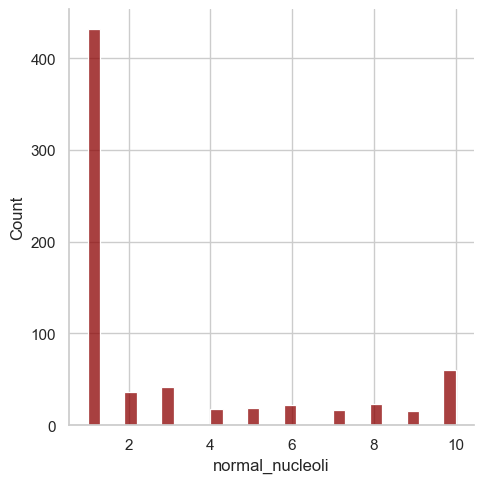

In [70]:
sns.displot(datos['normal_nucleoli'].dropna(), color = 'darkred', bins = 30)

Al revisar la variable de uniform cell shape, se pudo determinar la misma distribución de los datos. Nuevamente, se tiene la mayoría de datos con el menor indicador posible, mientras que existen unos pocos valores con un indicador máximo de variación 10. 

<AxesSubplot: xlabel='uniform_cell_shape', ylabel='count'>

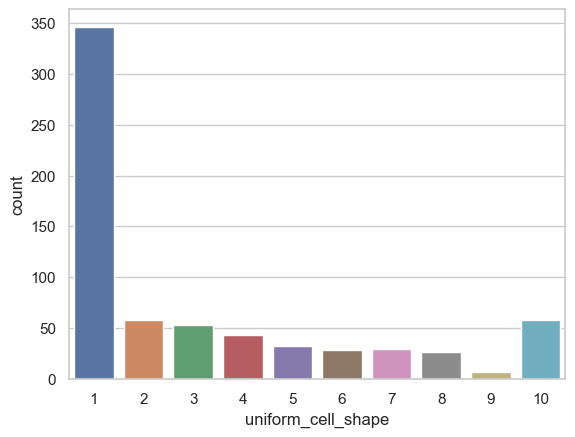

In [71]:
sns.countplot(x = 'uniform_cell_shape', data = datos)

Por otro lado, se quería determinar si existía alguna relación entre uniform cell shape y cell size. En este caso, se pudo observar cómo las variables coincidían en ciertos aspectos. Mientras más variación haya en el tamaño de la celula, más variación tendrá en su forma también; el opuesto también es válido. 

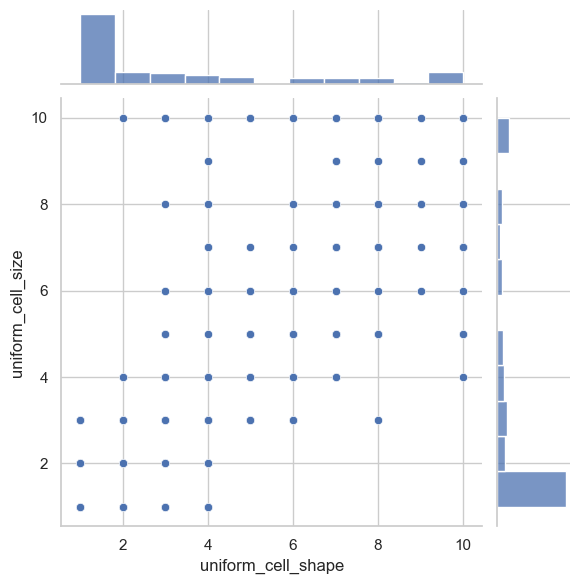

In [72]:

sns.jointplot(x = 'uniform_cell_shape', y = 'uniform_cell_size', data = datos)


__________
### 1.4. Aísle las variables numéricas de las categóricas, haga un análisis de correlación entre las mismas.
En este caso, las variables categóricas son el class (tipo de tumor) y el ID de la muestra respectiva. Por tal razón, se separaron estas variables del dataset y se realizó una matriz de correlación para poder determinar el grado de correlación entre las mismas.

Como se puede observar en el mapa de correlación, la mayoría de variables están relacionadas entre sí. La mayoría de variables tienen una correlación de 0.5 y superior. Esto a excepción de la variable de mitosis, la cual tiene un grado de correlación promedio de 0.4 con las otras variables.

Las variables cuantitativas que mayor relación tienen son uniform cell size y uniform cell shape. Esto probablemente ya que cuando se tiene tumores malignos (cancer), se tiene una multiplicación de celulas abnormales. Como resultado, si hay cancer se tiene una alta variación de tamaños y formas de las celulas. Sin embargo, en casos benignos esto puede permanecer más constante. 

Asimismo, estas dos variables (uniform cell size y shape) tienen la mayor cantidad de coorelación con otras variables, como normal nucleoli y bland chromatin. Nuevamente debido a que si son de tamaño normal y de forma normal, probablemente tendrán un núcleo normal también... por ejemplo. 

/var/folders/wq/gs7vpwkj7k31lw9njy09srjw0000gn/T/ipykernel_34808/155514855.py:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



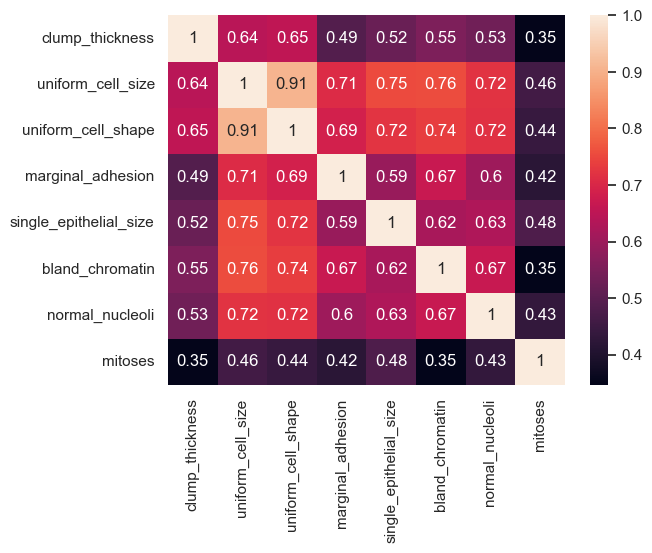

In [73]:
# separar las variables numéricas y categóricas
num_vars = datos[['clump_thickness', 'uniform_cell_size', 'uniform_cell_shape', 'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses']]

# matriz de correlación númericas
sns.heatmap(num_vars.corr(), annot=True)
plt.show()

A través de la función corr() también se puede determinar cuáles variables y a qué grado se relacionan las mismas con una variable específica. En este caso, las variables que más afectan el tipo de tumor son uniform cell shape y cell size. Las otras variables tienen una relación entre 0.68 a 0.75; a excepción de mitosis que tienen la menor relación con 0.42.

Nuevamente, se asume que la alta correlación de class con cell shape y cell size se debe a que cuando hay cancer, el tamaño y forma de las células es muy variado. Mientras que si no hay cancer, esto suele ser más normal y sin tanta variación.

In [74]:
num_vars_corr = datos[['clump_thickness', 'uniform_cell_size', 'uniform_cell_shape', 'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']]

#quickda which columns affect attendance
a = num_vars_corr.corr()['class'].sort_values(ascending=False) 
print("\nVariables que afectan el tipo de tumor:")
print(a)


Variables que afectan el tipo de tumor:
class                     1.000000
uniform_cell_shape        0.821891
uniform_cell_size         0.820801
bland_chromatin           0.758228
normal_nucleoli           0.718677
clump_thickness           0.714790
marginal_adhesion         0.706294
single_epithelial_size    0.690958
mitoses                   0.423448
Name: class, dtype: float64


/var/folders/wq/gs7vpwkj7k31lw9njy09srjw0000gn/T/ipykernel_34808/4040804703.py:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



_____________
### 1.5. Utilice   las  variables   categóricas,   haga   tablas  de   frecuencia,   proporción,   gráficas de barras o cualquier otra técnica que le permita explorar los datos
En este caso, las únicas variables categóricas son el ID de la muestra y Class (tipo de tumor). Sin embargo, la variable de ID es irrelevante para este estudio, ya que no presenta ninguna información relevante. Por tal razón, solo se estará analizando la variable de class.

A continuación se presenta la tabla de frecuencia correspondiente, en la cual se puede observar cómo los tumores benignos representan 458 de 699 datos; esto siendo la mayoría.

In [75]:
categoricas = ['class']

# tablas de frecuencia variables categoricas
for col in categoricas:
    print("\n****************************\n",col,"\tFrecuencia","\n****************************")
    print(datos[col].value_counts())
    print("\n donde 2 es benigno y 4 es maligno")


****************************
 class 	Frecuencia 
****************************
2    444
4    239
Name: class, dtype: int64

 donde 2 es benigno y 4 es maligno


En caso de analizar los datos en formato de proporción, podemos observar que los tumores benignos representan un 65.01% de los datos, mientras que los malignos representan un 34.99%.

In [76]:
#tabla de proporciones
for col in categoricas:
    print("\n****************************\n",col,"\tProporción","\n****************************")
    print(datos[col].value_counts(normalize=True))


****************************
 class 	Proporción 
****************************
2    0.650073
4    0.349927
Name: class, dtype: float64


Esta misma información se puede representar a través de una gráfica de barras. A través de esta se puede observar visualmente la relación y proporción de las mismas variables.

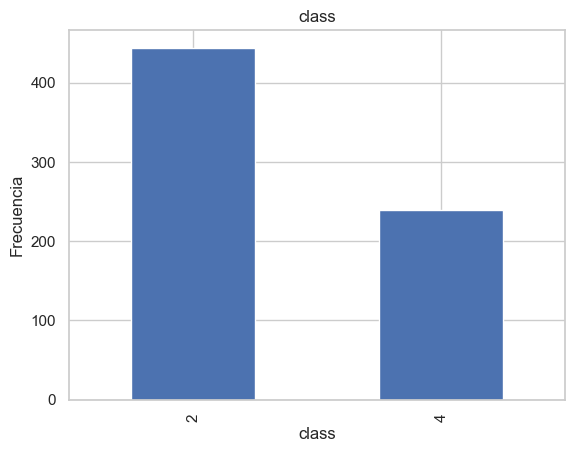

In [77]:
#grafica de barras with name of the columns and axis
for col in categoricas:
    plt.figure()
    datos[col].value_counts().plot(kind='bar', title=col)
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()


___
### 1.6. Realice la limpieza de variables utilizando las técnicas vistas en clase, u otras que piense pueden ser de utilidad

A través del análisis exploratorio se pudo determinar que existen varios puntos en la columa de Núcleos Desnudos donde existen valores faltantes representados por '?'. En este punto, deseamos dar valores a los datos faltantes en vez de solo eliminar las filas que no tengan ese valor.  Una forma de hacerlo es usando el numero promedio de núcleos desnudos. 


In [78]:
# Convertimos data a csv
datos = pd.read_csv('breast-cancer-wisconsin.data', header=None)

# Se le asigna un nombre a cada columna
datos.columns = ['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape', 'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']

#para todos los ? los cambiamos por NaN
datos.replace('?', np.nan, inplace=True)

def impute_bare_nuclei(cols):
    bare_nuclei = cols[0]
    if pd.isnull(bare_nuclei):
        datos['bare_nuclei'] = datos['bare_nuclei'].astype(float)
        return datos['bare_nuclei'].mean()
    else:
        return bare_nuclei



Se aplica la función para llegar dichos espacios vacíos con el promedio de la columna.

In [79]:
datos['bare_nuclei'] = datos[['bare_nuclei']].apply(impute_bare_nuclei, axis = 1)

Se puede ver el nuevo mapa de color sin datos nulos; esto representando que se pudo remplazar los valores faltantes con este promedio.


<AxesSubplot: >

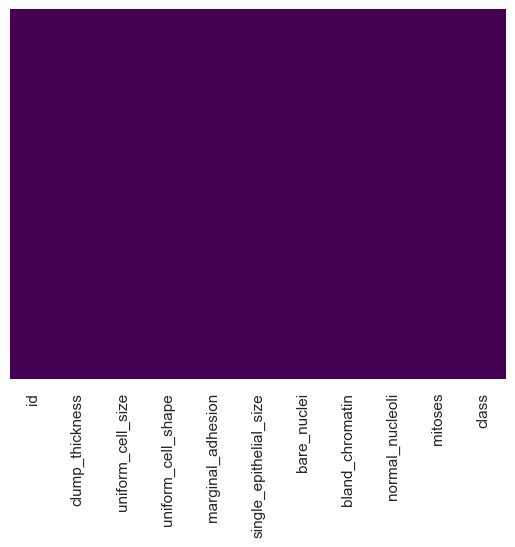

In [80]:
sns.heatmap(datos.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

--------------
## Parte 2

### 2.1. Pruebe los modelos de Regresión Logística y el de K-NN

#### Importar librerías

In [81]:
from sklearn.model_selection import train_test_split

#### Separación de variables, creación de conjuntos de entreno y prueba
En este caso, se separan las variables independientes de la dependiente. Esto con la intención de poder generar el conjunto de entreno y prueba, utilizando 30% de los datos. Estos conjuntos serán utilizados por el modelo de regresión logiística y K-NN.

In [82]:
X = datos[['clump_thickness', 'uniform_cell_size', 'uniform_cell_shape', 'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses']]
Y = datos['class']

X_entreno, X_prueba, y_entreno, y_prueba = train_test_split(X, Y, test_size = 0.30, random_state = 101)

#### Regresión Logística
Como primer paso de la regresión logística, se importó la librería de SKLearn que permite poder utilizar este modelo matemático. 

In [83]:
from sklearn.linear_model import LogisticRegression

Posteriormente, se crea el modelo de regresión logística con los valores de X_entreno y Y_entreno.

In [84]:
modeloLog = LogisticRegression(max_iter = 500)
modeloLog.fit(X_entreno,y_entreno)

LogisticRegression(max_iter=500)

Finalmente, se hace una predicción en base a los valores de prueba para poder posteriormente evaluar el respectivo modelo.

In [85]:
predicciones = modeloLog.predict(X_prueba)

Para poder hacer el análisis, se importa la librería de SKLearn de métricas y el reporte de clasificación. Esto permitirá poder evaluar el respectivo modelo así como qué tan exacto es. 

In [86]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score

Como se puede observar a continuación, el modelo presenta una exactitud (según Classification_Report) de 96%. En el caso de determinar si un tumor es benigno o maligno, el modelo es 95% preciso a la hora de identificar tumores benignos y 97% preciso para indicar tumores malignos.

In [87]:
print(classification_report(y_prueba, predicciones))

              precision    recall  f1-score   support

           2       0.95      0.98      0.97       129
           4       0.97      0.91      0.94        81

    accuracy                           0.96       210
   macro avg       0.96      0.95      0.95       210
weighted avg       0.96      0.96      0.96       210



También se puede comprobar la exactitud del modelo a través de los falsos positivos y falsos negativos que calcula el respectivo modelo. En este caso, se tienen los siguientes resultados:

Verdaderos Positivos: Hay 127 instancias donde el modelo predijo correctamente la variable positiva

Verdaderos Negativos: Hay 74 instancias donde el modelo predijo correctamente la variable negativa

Falsos Positivos: Hay 2 instancias donde el modelo predijo incorrectamente la variable positiva

Falsos Negativos: Hay 7 instancias donde el modelo predijo incorrectamente la variable negativa

En otras palabras, solo se equivocó 9 de 210 pruebas.

In [88]:
confusion_matrix(y_prueba,predicciones)

array([[127,   2],
       [  7,  74]])

Finalmente, también se puede determinar la nota de exactitud del modelo a través de la siguiente función. En este caso, se obtuvo un porcentaje de exactitud de 95.71%. Esto indicando que el modelo es bastante exacto y es capaz de predecir, en casi todos los casos, si un tumor es benigno o maligno.

In [89]:
accuracy_score(y_prueba, predicciones)

0.9571428571428572

#### K-NN
Como primer paso de K-NN, se importó la librería de SKLearn que permite poder utilizar este modelo matemático. 

In [90]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

Posteriormente, se utiliza el siguiente ciclo para determinar un buen valor de K. En este caso, se hace uso del método del codo (elbow method) para seleccionar un buen valor para K.

In [91]:
tasa_error = []

# Puede tardar un poco
for i in range(1, 40):
    
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_entreno, y_entreno)
    pred_i = knn.predict(X_prueba)
    tasa_error.append(np.mean(pred_i != y_prueba))

A continuación se presenta una gráfica donde se muestran cómo los diferentes valores de K afectan la tasa de error. En este caso, se quiere seleccionar un punto donde la gráfica se e.stabilice después de la caída inicial. En este caso, este punto es cuando K>=13 ya que la tasa de error se mantiene entre 0.02 y 0.035

Text(0, 0.5, 'Tasa de Error')

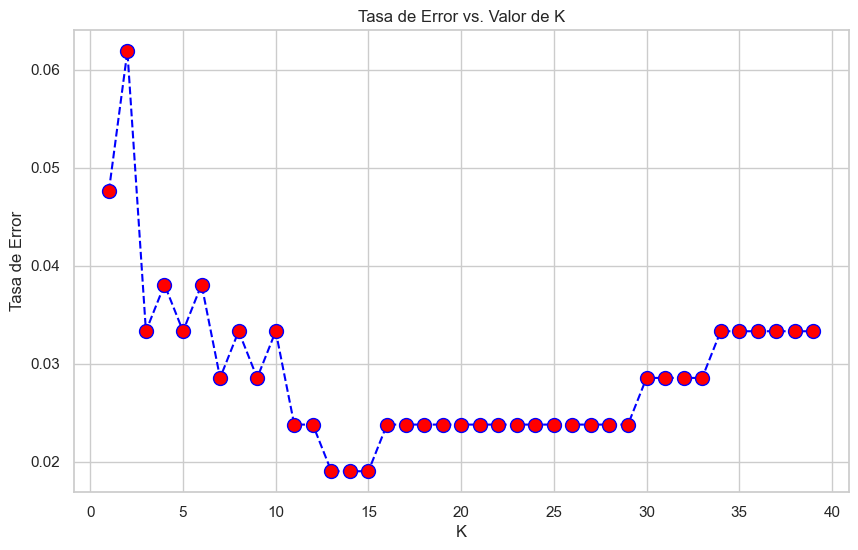

In [92]:
plt.figure(figsize = (10, 6))
plt.plot(range(1, 40), tasa_error, color = 'blue', linestyle = 'dashed', marker = 'o',
         markerfacecolor = 'red', markersize = 10)
plt.title('Tasa de Error vs. Valor de K')
plt.xlabel('K')
plt.ylabel('Tasa de Error')

A continuación se vuelve a crear el modelo de K-NN con el valor K seleccionado. 

En este caso, como se puede ver a continuación, se tiene una matriz de confusión. A través de esto se puede comprobar la exactitud del modelo a través de los falsos positivos y falsos negativos que calcula el respectivo modelo. En este caso, se tienen los siguientes resultados:

Verdaderos Positivos: Hay 127 instancias donde el modelo predijo correctamente la variable positiva

Verdaderos Negativos: Hay 79 instancias donde el modelo predijo correctamente la variable negativa

Falsos Positivos: Hay 2 instancias donde el modelo predijo incorrectamente la variable positiva

Falsos Negativos: Hay 2 instancias donde el modelo predijo incorrectamente la variable negativa

En otras palabras, solo se equivocó 2 de 210 pruebas.

Por otro lado, como se puede observar, el modelo presenta una exactitud (según Classification_Report) de 98%. En el caso de determinar si un tumor es benigno o maligno, el modelo es 98% preciso a la hora de identificar tumores benignos y 98% preciso para indicar tumores malignos.

In [93]:
knn = KNeighborsClassifier(n_neighbors=13)

knn.fit(X_entreno,y_entreno)
pred = knn.predict(X_prueba)

print('CON K = 13')
print()
print('Matriz de Confusión\n')
print(confusion_matrix(y_prueba,pred))
print('\n')
print(classification_report(y_prueba,pred))

CON K = 13

Matriz de Confusión

[[127   2]
 [  2  79]]


              precision    recall  f1-score   support

           2       0.98      0.98      0.98       129
           4       0.98      0.98      0.98        81

    accuracy                           0.98       210
   macro avg       0.98      0.98      0.98       210
weighted avg       0.98      0.98      0.98       210



Finalmente, también se puede determinar la nota de exactitud del modelo a través de la siguiente función. En este caso, se obtuvo un porcentaje de exactitud de 98.09%. Esto indicando que el modelo es bastante exacto y es capaz de predecir, en casi todos los casos, si un tumor es benigno o maligno.

In [94]:
accuracy_score(y_prueba, pred)

0.9809523809523809

-------------
### 2.2. ¿Cuál es el modelo con mejor rendimiento?     Utilice las métricas vistas en clase para dar respaldo a su respuesta

En este caso se presenta el accuracy de ambos modelos. Como se puede observar a continuación, el modelo de K-NN cuenta con un mejor rendimiento, ya que es capaz de predecir el tipo de tumor con más exactitud promedio. Sin embargo, cabe destacar que la diferencia entre ambos modelos es casi mínima, ya que uno cuenta con una exactitud de 98.09% (KNN) y el otro con 95.71% (regresión logística). Esto representando únicamente una diferencia de 2.38%.

In [95]:
print("RENDIMIENTO - KNN")
accuracy_score(y_prueba, pred)

RENDIMIENTO - KNN


0.9809523809523809

In [96]:
print("RENDIMIENTO - REGRESIÓN LOGÍSTICA")
accuracy_score(y_prueba, predicciones)

RENDIMIENTO - REGRESIÓN LOGÍSTICA


0.9571428571428572

Por otro lado, a la hora de analizar los falsos positivos y faltos positivos, podemos observar cómo el modelo K-NN tiene una menor cantidad de falsos positivos (2 a comparación de los 7 de la regresión logística). Esto siendo indicador de que, nuevamente, se equivoca menos a la hora de hacer la respectiva predicción.

In [97]:
print("RENDIMIENTO (Confusion Matrix) - KNN")
confusion_matrix(y_prueba,pred)

RENDIMIENTO (Confusion Matrix) - KNN


array([[127,   2],
       [  2,  79]])

In [98]:
print("RENDIMIENTO (Confusion Matrix) - REGRESIÓN LOGÍSTICA")
confusion_matrix(y_prueba,predicciones)

RENDIMIENTO (Confusion Matrix) - REGRESIÓN LOGÍSTICA


array([[127,   2],
       [  7,  74]])

------------
## Hallazgos y Conclusiones

A través del análisis exploratorio se pudo llegar a los siguientes hallazgos:

1. De las muestras analizadas, 444 muestras representan tumores benignos. Las otras 239 muestras representan tumores malignos. Esto corresponde a una proporción de 65.01% y 34.99%, respectivamente.

2. Las variables de uniform_cell_shape y uniform_cell_size tienen un patrón indicativo de tumores malignos; la mayoría de muestras con valores superiores a 8 indican presencia de tumores malignos. 

3. Existe una alta correlación entre uniform_cell_shape y uniform_cell_size, con un valor de 91%. Asimismo, estas variables se relacionan y afectan un 82% (cada una) al tipo de tumor. 

4. Mitosis es la variable que menos afecta el tipo de tumor, con una correlación de 42%. 

5. La mayoría de muestras con tumores benignos tienen los indicadores de todas las variables en un rango de 1 a 3. 

6. Las variables de uniform_cell_size y uniform_cell_shape se relacionan directamente con todas las otras variables numéricas (a excepción de mitosis) con un valor de correlación promedio de 70%.

7. La variable de clump_thickness se diferencia al resto ya que los rangos son más distribuídos. Asimismo, en ciertos tumores malignos se puede encontrar esta variable con valores bajos; esto a diferencia de otras variables que únicamente presentan valores altos cuando es maligno.

8. La variable de mitosis contaba con casi un 90% de los datos en el indicador más bajo (1). Esto causando que su diagrama de caja y bigotes únicamente presente puntos atípicos indicadores, posiblemente, de tumores malignos.

9. El modelo K-NN presentó una exactitud y precisión más alta que el modelo de regresión logística (98.09% de exactitud vs. 95.71% de exactitud). Cabe destacar que el modelo K-NN contaba con una mejor proporción de valores falsos positivos y falsos negativos. Esto debido a que tenía una menor cantidad de estos valores, a comparación del otro modelo (2 falsos positivos y 2 falsos negativos vs. 2 falsos positivos y 7 falsos negativos).

10. El modelo K-NN presentaba una menor tasa de error entre los rangos de K de 13 y 29. 


En base a los hallazgos, se pudo construir las siguientes conclusiones:

1. El modelo K-NN presenta el mejor modelo de predicciones para determinar si un tumor es benigno o maligno, en términos de exactitud promedio. 

2. El modelo K-NN es menos probable a dar un resultado erróneo a comparación del modelo de regresión logística. Esto debido a que presenta una menor cantidad de falsos negativos. 

3. Las variables de uniform_cell_size y uniform_cell_shape pueden ser las que más se relacionan al tipo de tumor debido a que cuando existe cancer, las células se reproducen de manera abnormal. Esto puede resultar en tamaños y formas fuera de lo normal. 

4. Las variables de uniform_cell_size y uniform_cell_shape se relacionan entre sí debido a que crecimiento abnormal de una célula suele ser acompañado de una forma abnormal. Esto es más notable, nuevamente, en pacientes con tumores malignos.

5. La variable de mitosis es la que menor cantidad de correlación tiene debido a que si existe un tumor (benigno o maligno), se están generando más células de lo común.

6. 

--------
## GitHub
https://github.com/20Candy/Lab2Mineria